In [67]:
%matplotlib inline
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import math

In [40]:
dictionary_words = pd.read_csv('Dictwords.csv')
table = pd.read_csv('testquestions.csv')

In [41]:
table.head()

,Speciality,Questions,Rating,Question quality,Answer Quality,Question character count,Answer character count,FAQ?,Could the doctor have given a better answer with the available information?,Where did this fall through?,How could we change this?
0,Dermatology,Jasmines mad I can't believe that this was the up side to be the first place I have no clue who I want | Dermatologist/Cosmetologist | Hi. Jasmine???? Sorry I don't think your question or doubt is coherent. Kindly resend your question on private or public chat. Also kindly specify the specialty of healthcare doctor you would. Like to place your query to.. Regards ..,1,-1,1,102,233,-,-,Training in rejection reason.,Spam identification
1,General Physician,"I&apos;m looking for comprehensive medical checkup. No complaints as of now, but erratic lifestyle. Please suggest a hospital which has any package type medical check up. I&apos;m also guessing a comprehensive medical checkup can be done under 9 to 10 thousand. | General Physician | Hi \rAll corporate hospitals will have packages for health check up.... Kindly contact hospital in person to know details....",No rating,0,1,261,124,Yes,No,"This is not a medical question, and patient should be trained",Non medical question
2,General Physician,"I&apos;m looking for comprehensive medical checkup. No complaints as of now, but erratic lifestyle. Please suggest a hospital which has any package type medical check up. I&apos;m also guessing a comprehensive medical checkup can be done under 9 to 10 thousand. | General Physician | Hello there. You can go to any hospital for a checkup. \rA physician will examine you completely and suggest a few screening tests for which 10k is more than enough. \rGo to a good lab for the tests. \rRegards",No rating,0,1,261,212,Yes,No,"This is not a medical question, and patient should be trained",Non medical question
3,General Physician,I am Suffering From Right Side Chest shortness Of Breath Thigtness In The Chest What Is My Problem... | General Physician | We need more information regarding your symptoms. It is better to see a physician get examined and treated.,4,1,1,98,109,No,Yes,Physical examination was needed,One click 'Physical consultation is needed' request you to go see a doctor in person about this
4,General Physician,"On my both hand various blood vein show in summer plz give me any treatment \rWhen I get up to sleep many blood veins are also show | General Physician | Veins are located Superficially, only the fat people need to worry when they dont see their veins.you are perfectly alright",4,1,2,129,123,No,Yes,Doctor training,nothing to do here


In [42]:
table["parsed_text_qn"] = table["Questions"].map(lambda x: re.sub("[ ]+", " ", (re.sub("[^A-Za-z ]+", " ", re.sub("'", "", str(x).split("|")[0]))).strip()))

In [43]:
table["parsed_text_ans"] = table["Questions"].map(lambda x: re.sub("[ ]+", " ", (re.sub("[^A-Za-z ]+", " ", re.sub("'", "", str(x).split("|")[2]))).strip()))

In [44]:
table['character_count_ans'] = table['parsed_text_ans'].map(lambda x: len(" ".join([y for y in x.split(" ") if len(y)>3])) )

In [45]:
table['character_count_qn'] = table['parsed_text_qn'].map(lambda x: len(" ".join([y for y in x.split(" ") if len(y)>3])) )

In [46]:
table['word_count_qn'] = table['parsed_text_qn'].map(lambda x: len(x.split(" ")))

In [64]:
table['word_count_qn_even'] = table.apply(lambda row: (int(['word_count_qn'])%2), axis =1)

TypeError: ("int() argument must be a string or a number, not 'list'", u'occurred at index 0')

In [47]:
dict_set = dictionary_words['word'].values

In [48]:
table['dict_score'] = table['parsed_text_qn'].map(lambda x: (len(x.split(" ")) - len([word for word in x.split(" ") if word not in dict_set]))/float(len(x.split(" "))))

In [65]:
table.head()

,Speciality,Questions,Rating,Question quality,Answer Quality,Question character count,Answer character count,FAQ?,Could the doctor have given a better answer with the available information?,Where did this fall through?,How could we change this?,parsed_text_qn,parsed_text_ans,character_count_ans,character_count_qn,word_count_qn,dict_score,normalised_char_count_ans,normalised_char_count_qn,word_count_qn_even
0,Dermatology,Jasmines mad I can't believe that this was the up side to be the first place I have no clue who I want | Dermatologist/Cosmetologist | Hi. Jasmine???? Sorry I don't think your question or doubt is coherent. Kindly resend your question on private or public chat. Also kindly specify the specialty of healthcare doctor you would. Like to place your query to.. Regards ..,1,-1,1,102,233,-,-,Training in rejection reason.,Spam identification,Jasmines mad I cant believe that this was the up side to be the first place I have no clue who I want,Hi Jasmine Sorry I dont think your question or doubt is coherent Kindly resend your question on private or public chat Also kindly specify the specialty of healthcare doctor you would Like to place your query to Regards,185,63,23,0.826087,0.122738,0.000000,1
1,General Physician,"I&apos;m looking for comprehensive medical checkup. No complaints as of now, but erratic lifestyle. Please suggest a hospital which has any package type medical check up. I&apos;m also guessing a comprehensive medical checkup can be done under 9 to 10 thousand. | General Physician | Hi \rAll corporate hospitals will have packages for health check up.... Kindly contact hospital in person to know details....",No rating,0,1,261,124,Yes,No,"This is not a medical question, and patient should be trained",Non medical question,I apos m looking for comprehensive medical checkup No complaints as of now but erratic lifestyle Please suggest a hospital which has any package type medical check up I apos m also guessing a comprehensive medical checkup can be done under to thousand,Hi All corporate hospitals will have packages for health check up Kindly contact hospital in person to know details,95,197,43,0.767442,0.051928,0.294833,1
2,General Physician,"I&apos;m looking for comprehensive medical checkup. No complaints as of now, but erratic lifestyle. Please suggest a hospital which has any package type medical check up. I&apos;m also guessing a comprehensive medical checkup can be done under 9 to 10 thousand. | General Physician | Hello there. You can go to any hospital for a checkup. \rA physician will examine you completely and suggest a few screening tests for which 10k is more than enough. \rGo to a good lab for the tests. \rRegards",No rating,0,1,261,212,Yes,No,"This is not a medical question, and patient should be trained",Non medical question,I apos m looking for comprehensive medical checkup No complaints as of now but erratic lifestyle Please suggest a hospital which has any package type medical check up I apos m also guessing a comprehensive medical checkup can be done under to thousand,Hello there You can go to any hospital for a checkup A physician will examine you completely and suggest a few screening tests for which k is more than enough Go to a good lab for the tests Regards,128,197,43,0.767442,0.077891,0.294833,1
3,General Physician,I am Suffering From Right Side Chest shortness Of Breath Thigtness In The Chest What Is My Problem... | General Physician | We need more information regarding your symptoms. It is better to see a physician get examined and treated.,4,1,1,98,109,No,Yes,Physical examination was needed,One click 'Physical consultation is needed' request you to go see a doctor in person about this,I am Suffering From Right Side Chest shortness Of Breath Thigtness In The Chest What Is My Problem,We need more information regarding your symptoms It is better to see a physician get examined and treated,79,77,18,0.111111,0.039339,0.000000,0
4,General Physician,"On my both hand various blood vein show 

In [63]:
table['normalised_dict_score'] = table.apply(lambda row: ((2*['dict_score']-1)**(1/['word_count_qn']) if ['word_count_qn']%2 = 1 else (2*['dict_score']-1)**(1/['word_count_qn'] + 1)), axis =1)

SyntaxError: invalid syntax (<ipython-input-63-8810bb25ac5f>, line 1)

In [68]:
table['normalised_dict_score'] = table.apply(lambda x: math.pow((2* x["dict_score"] - 1), 1.0/x["word_count_qn"]))

KeyError: ('dict_score', u'occurred at index Speciality')

In [69]:
table["odd_word_count"] = table["word_count_qn"].map(lambda x: (1.0 / (2*int(x/2) + 1)))

In [72]:
table['dict_score_s'] = 2 *table ['dict_score'] - 1

In [76]:
table['dict_score_normalised'] = np.sign(table["dict_score_s"]) * np.power(np.abs(table["dict_score_s"].values), table["odd_word_count"].values)

In [49]:
char_min = 29
char_max = 1300
table['normalised_char_count_ans'] = table['character_count_ans'].map(lambda x: float(x - char_min)/(char_max - char_min) if x < char_max and x > char_min else
0 if x < char_min else 1)

In [50]:
char_min = 100
char_max = 429
table['normalised_char_count_qn'] = table['character_count_qn'].map(lambda x: float(x - char_min)/(char_max - char_min) if x < char_max and x > char_min else
0 if x < char_min else 1)
print char_min
print char_max

100
429


In [77]:
pd.set_option('display.max_colwidth', 2000)
table[['Speciality','parsed_text_qn','parsed_text_ans','character_count_qn','character_count_ans','normalised_char_count_qn','normalised_char_count_ans','word_count_qn','dict_score','odd_word_count','dict_score_normalised']]

,Speciality,parsed_text_qn,parsed_text_ans,character_count_qn,character_count_ans,normalised_char_count_qn,normalised_char_count_ans,word_count_qn,dict_score,odd_word_count,dict_score_normalised
0,Dermatology,Jasmines mad I cant believe that this was the up side to be the first place I have no clue who I want,Hi Jasmine Sorry I dont think your question or doubt is coherent Kindly resend your question on private or public chat Also kindly specify the specialty of healthcare doctor you would Like to place your query to Regards,63,185,0.000000,0.122738,23,0.826087,0.043478,0.981587
1,General Physician,I apos m looking for comprehensive medical checkup No complaints as of now but erratic lifestyle Please suggest a hospital which has any package type medical check up I apos m also guessing a comprehensive medical checkup can be done under to thousand,Hi All corporate hospitals will have packages for health check up Kindly contact hospital in person to know details,197,95,0.294833,0.051928,43,0.767442,0.023256,0.985554
2,General Physician,I apos m looking for comprehensive medical checkup No complaints as of now but erratic lifestyle Please suggest a hospital which has any package type medical check up I apos m also guessing a comprehensive medical checkup can be done under to thousand,Hello there You can go to any hospital for a checkup A physician will examine you completely and suggest a few screening tests for which k is more than enough Go to a good lab for the tests Regards,197,128,0.294833,0.077891,43,0.767442,0.023256,0.985554
3,General Physician,I am Suffering From Right Side Chest shortness Of Breath Thigtness In The Chest What Is My Problem,We need more information regarding your symptoms It is better to see a physician get examined and treated,77,79,0.000000,0.039339,18,0.111111,0.052632,-0.986860
4,General Physician,On my both hand various blood vein show in summer plz give me any treatment When I get up to sleep many blood veins are also show,Veins are located Superficially only the fat people need to worry when they dont see their veins you are perfectly alright,93,95,0.000000,0.051928,27,0.814815,0.037037,0.983012
5,General Physician,Just needed a clear vision if doing a master health check up will be appropriate for ma fiance because he smokes and drinks daily I wanted to have an idea on how to start the process for the treatment,Hi complete hemogram lipid profile liver function tests renal function tests should be done Alcohol and nicotine de addiction should be done Which includes counseling nicotine replacement therapy pharmacotherapy Kindly consult Psychiatrist for de addiction of substance of abuse,143,249,0.130699,0.173092,39,0.897436,0.025641,0.994131
6,General Physician,Hi I am experiencing mild chest pain on the right side for days now I went to a medical shop and got tablets I presume that were for gastric problems although I don apos t have those problems although the pain has reduced but it apos s still there and had shifted a lil towards the right side I m put up at Indiranagar,Hello there Since you have already taken medicines you have to consult a surgeon for examination of your abdomen Only then we will prescribe medicines If you are expecting to find prescription here its not possible to prescribe on this platform Regards,217,201,0.355623,0.135327,64,0.750000,0.015385,0.989393
7,General Physician,Hi Is it advisable to sleep for an hour in the afternoon post lunch Does it increase weight Pls suggest,As u have rightly put its an afternoon nap not a sleep It should be preferably for short time,70,57,0.000000,0.022030,20,0.800000,0.047619,0.975968
8,Dermatology,Coz of my over weight im not able to conceive so im thinking ko getting liposuction will it b safe for pregnancy and how much time my body will take to recover after this liposuction operation,Liposuction just removes fat from under your skin If you are over weight and having infertility your body had hormonal problems Removing the fat surgically

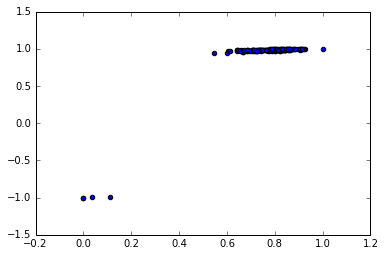

In [78]:
plt.scatter(table['dict_score'], table['dict_score_normalised'])

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True, n_jobs=-1)

In [79]:
lr = lr.fit(np.array(table[["normalised_char_count_qn","dict_score_normalised"]]), table["Question quality"].values)
lr.coef_

array([ 1.91452166,  0.29533913])

In [80]:
total = 0
for x in table["Question quality"] - lr.predict(np.array(table[["normalised_char_count_qn","dict_score_normalised"]])):
    total += x*x

In [82]:
print(np.sqrt((float(1)/len(table)) * total))

0.714125100758


In [83]:
lr.intercept_

1.3757423654935412

In [84]:
table_2 = table[table['normalised_char_count_qn']>0]

In [90]:
len(table), len(table_2)

(153, 151)

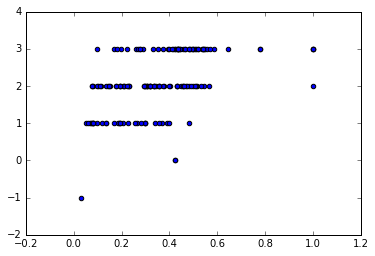

In [89]:
plt.scatter(table_2['normalised_char_count_qn'], table_2['Question quality'])

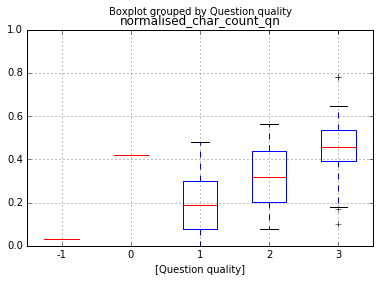

In [79]:
table[["Question quality", "normalised_char_count_qn"]].boxplot(by="Question quality")

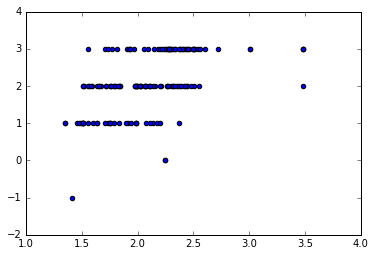

In [80]:
plt.scatter(lr.predict(np.array(table[["normalised_char_count_qn"]])), table["Question quality"])

In [49]:
table[['Question quality', 'Rating', 'normalised_char_count_ans']].corr()

,Question quality,Rating,normalised_char_count_ans
Question quality,1.000000,0.089409,-0.073001
Rating,0.089409,1.000000,-0.019786
normalised_char_count_ans,-0.073001,-0.019786,1.000000


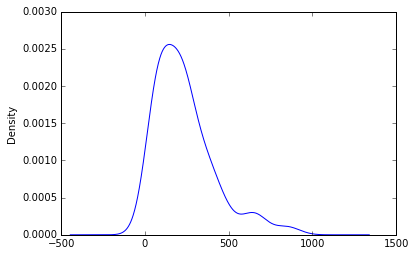

In [51]:
table["character_count_ans"].plot(kind='kde')

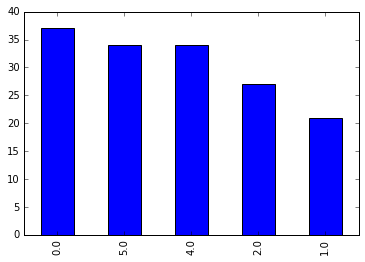

In [54]:
table["Rating"].value_counts().plot(kind="bar")

In [40]:
table["Rating"].replace({'No rating':0}, inplace=True)

In [41]:
table["Rating"].fillna(0, inplace=True)

In [48]:
table["Rating"] = table.Rating.astype(float)

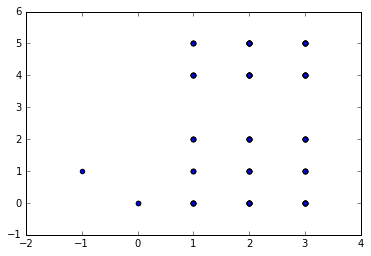

In [42]:
plt.scatter(table["Question quality"], table["Rating"].astype(float))

In [31]:
table[(table["An"]<1.5) & (table["Question quality"]>1)]

,Speciality,Questions,Rating,Question quality,Answer Quality,Question character count,Answer character count,FAQ?,Could the doctor have given a better answer with the available information?,Where did this fall through?,How could we change this?,parsed_text_qn,parsed_text_ans,characters_count_ans,character_count_ans,normalised_char_count_ans
40,Dermatology,Does psoriasis have any allopathic/homeopathy cure in india? \rAs i&apos;ve researched internet about it and i found out that it does not have any cure it can only be controlled. I&apos;m worried cuz i&apos;m facing it\r&amp; it is bad as f**k please let me know. | Dermatologist/Cosmetologist | Psoriasis can not be cured but it can be reasonably controlled with medicine so don't get disheartened.\rYou can contact Dr Ankur Talwar at Talwar Skin Institute in Lucknow,4,2,1,261,174,No,Yes,Doctor is pushing his own clinic,"Show the doctor how the answer is shown on patient side, and ease of booking an appointment",Does psoriasis have any allopathic homeopathy cure in india As i apos ve researched internet about it and i found out that it does not have any cure it can only be controlled I apos m worried cuz i apos m facing it amp it is bad as f k please let me know,Psoriasis can not be cured but it can be reasonably controlled with medicine so dont get disheartened You can contact Dr Ankur Talwar at Talwar Skin Institute in Lucknow,120,120,0.134378
44,Orthopedist,My wife once had undergone knife for pilonidal absecess 3 yr back. She is again experiencing pains in the area.\rCan you please guide which speciality doctor to consult? | Orthopedist | General surgeon would be better choice ........Consult nearest general surgeon for clinical examination they will do the needful........ Use practo app to find best doctors in your area .....choose doctors with good reviews .......\rRegards,5,2,1,168,239,No,Yes,Doctor gave direction because they did not know the answer. This qs has nothing to do with Orthopedist. Speciality selection is the issue,Refer to different speciality,My wife once had undergone knife for pilonidal absecess yr back She is again experiencing pains in the area Can you please guide which speciality doctor to consult,General surgeon would be better choice Consult nearest general surgeon for clinical examination they will do the needful Use practo app to find best doctors in your area choose doctors with good reviews Regards,182,182,0.203807
46,Urologist,"I have high level of protein in urine...but creatnine level is norml...i hav somewhat body pain when driving for a long time...aluminum and potasium amount is also little bit high in blood...plz guide something | Urologist | stop dryfruits,paalak,pulses,curd,bakery items,frmntd dfood,frozen items.\rdrink luke warm water whole day.\rtake meal on time.\rit is curable in ayurveda.consult ayurvd phyaician",NaN,2,1,210,176,No,Yes,Ayurveda assignment of Sexology questions,nothing to do here,I have high level of protein in urine but creatnine level is norml i hav somewhat body pain when driving for a long time aluminum and potasium amount is also little bit high in blood plz guide something,stop dryfruits paalak pulses curd bakery items frmntd dfood frozen items drink luke warm water whole day take meal on time it is curable in ayurveda consult ayurvd phyaician,157,157,0.175812
48,Urologist,"I have high level of protein in urine...but creatnine level is norml...i hav somewhat body pain when driving for a long time...aluminum and potasium amount is also little bit high in blood...plz guide something | Urologist | Thanks for expecting Healthier fitness solutions with Ayurved, its to be corelated with clinical status u need to share. Or cross verify it",NaN,2,0,210,139,No,Yes,Satish Sawale- this is fixed,Spam identification,I have high level of protein in urine but creatnine level is norml i hav somewhat body pain when driving for a long time aluminum and potasium amount is also little bit high in blood plz guide something,Thanks 

In [26]:
t = "| I get a severe headache on top portion of head which takes about 4-5 hrs to subside even after taking crocin advanced. Could there be any other problem. Eyesight is 6/6 | General Physician | Yes there may be we can not deny anything... You need to evaluated and examined for migraine, cluster headache, intracranial causes of headache with relevant investigations like MRI etc...Consult nearest neuro physician for clinical examination they will do the needful. | 5 |"

In [28]:
if "|" in t[:3]:
    ques = t.split("|")[1]
    ans = t.split("|")[3]
else:
    ques = t.split("|")[0]
    ans = t.split("|")[2]

In [30]:
ans

' Yes there may be we can not deny anything... You need to evaluated and examined for migraine, cluster headache, intracranial causes of headache with relevant investigations like MRI etc...Consult nearest neuro physician for clinical examination they will do the needful. '

In [ ]:
Weight Loss
Depression
Constipation
Kidney Stone
Erectile Dysfunction
Dark Circles
Premature Ejaculation
Chest Pain
Lower Back Pain
Irregular Periods
Throat Pain
Weight Gain
Frequent Urination
Breathing Problem
Tooth Pain
Acne Scars
Abdomen Pain
